In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential

In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.9 MB/s eta 0:00:00


In [ ]:
from tensorflow_addons.metrics import RSquare

In [ ]:
data = pd.read_csv('/content/vgsales.csv', index_col = "Rank")

In [ ]:
data.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**Preprocessing**

In [ ]:
columns_to_drop = ['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']
data.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
data

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006.0,Sports,Nintendo,82.74
2,NES,1985.0,Platform,Nintendo,40.24
3,Wii,2008.0,Racing,Nintendo,35.82
4,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16596,GBA,2002.0,Platform,Kemco,0.01
16597,GC,2003.0,Shooter,Infogrames,0.01
16598,PS2,2008.0,Racing,Activision,0.01


In [ ]:
data.isnull().sum()

Platform          0
Year            271
Genre             0
Publisher        58
Global_Sales      0
dtype: int64

In [ ]:
data['Year'] = data['Year'].fillna(data['Year'].mean())
data= data.dropna(axis=0)

Encoding

In [ ]:
data

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006.0,Sports,Nintendo,82.74
2,NES,1985.0,Platform,Nintendo,40.24
3,Wii,2008.0,Racing,Nintendo,35.82
4,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16596,GBA,2002.0,Platform,Kemco,0.01
16597,GC,2003.0,Shooter,Infogrames,0.01
16598,PS2,2008.0,Racing,Activision,0.01


In [ ]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
data['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

In [ ]:
onehot_columns = ['Platform', 'Genre', 'Publisher']

In [ ]:
def onehot_encode(data, columns):
    for column in columns:
        dummies = pd.get_dummies(data[column])
        data = pd.concat([data, dummies], axis=1)
        data.drop(column, axis=1, inplace=True)
    return data

In [ ]:
data = onehot_encode(data, onehot_columns)

In [ ]:
data

,Year,Global_Sales,2600,3DO,3DS,DC,DS,GB,GBA,GC,...,Zushi Games,bitComposer Games,dramatic create,fonfun,iWin,id Software,imageepoch Inc.,inXile Entertainment,"mixi, Inc",responDESIGN
Rank,,,,,,,,,,,,,,,,,,,,,
1,2006.0,82.74,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1985.0,40.24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008.0,35.82,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2009.0,33.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1996.0,31.37,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,2002.0,0.01,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16597,2003.0,0.01,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16598,2008.0,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Scaling

In [ ]:
y = data['Global_Sales']
X = data.drop('Global_Sales', axis=1)


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X.shape

(16540, 622)

# Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
inputs = tf.keras.Input(shape=(622,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(
    optimizer=optimizer,
    loss='mse'
)

epochs = 10
batch_size = 64

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size = batch_size,
    epochs=epochs,
    verbose=0
)

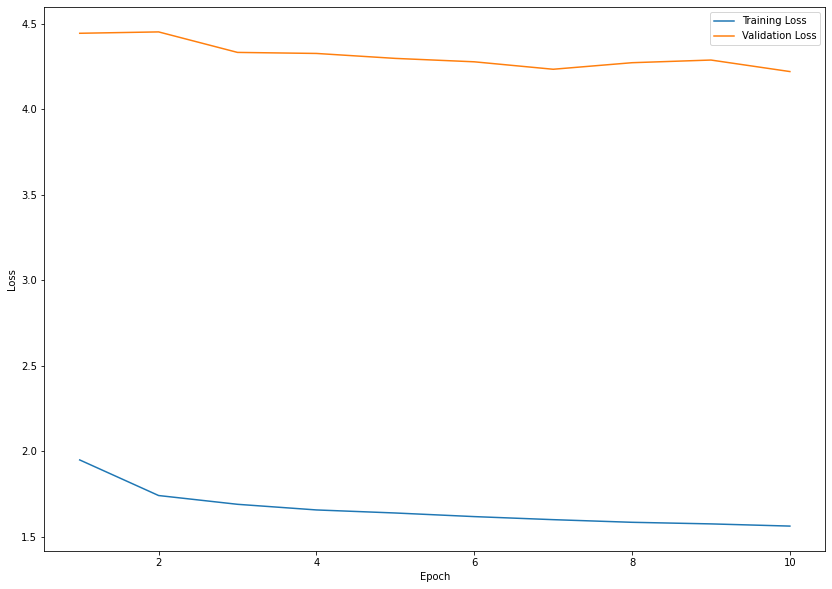

In [ ]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
y_pred = np.squeeze(model.predict(X_test))

result = RSquare()
result.update_state(y_test, y_pred)

print("R^2 Score:", result.result())

104/104 [==============================] - 0s 2ms/step
R^2 Score: tf.Tensor(0.16931975, shape=(), dtype=float32)


In [ ]:
model.evaluate(X_test, y_test)

104/104 [==============================] - 0s 4ms/step - loss: 1.4711


1.4711395502090454